In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import imagecodecs

from skimage import measure
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
from skimage import io
from skimage.feature import greycomatrix, greycoprops

In [2]:
image_rgb = io.imread("HELA/t007.tif")
image = img_as_ubyte(rgb2gray(image_rgb))
print(image.shape)

(512, 512)


<ipython-input-2-1318d71f0571>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = img_as_ubyte(rgb2gray(image_rgb))


# Gray Value Co-occurrence Matrix as texture descriptor


In [3]:
PATCH_SIZE = 20

# select some patches from borders
border_locations = [(332, 436), (290, 255), (248, 440), (133, 280)]
border_patches = []
for i,loc in enumerate(border_locations):
    a = image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE]
    border_patches.append(a)
#     print(a.shape)
    io.imsave('Border/Border %d.png'% (i + 29),a)
    

# select some patches from centers
center_locations = [(320, 296), (100, 263), (263, 390), (172, 261)]
center_patches = []
for loc in center_locations:
    a = image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE]
    center_patches.append(a)
    io.imsave('Center/Center %d.png'% (i + 29),a)


# select some patches from blan
blank_locations = [(30, 40), (20, 30), (20, 50), (10, 20)]
blank_patches = []
for loc in blank_locations:
    a = image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE]
    blank_patches.append(a)
    io.imsave('Blank/Blank %d.png'% (i + 29),a)
    
    


# Display the image patches

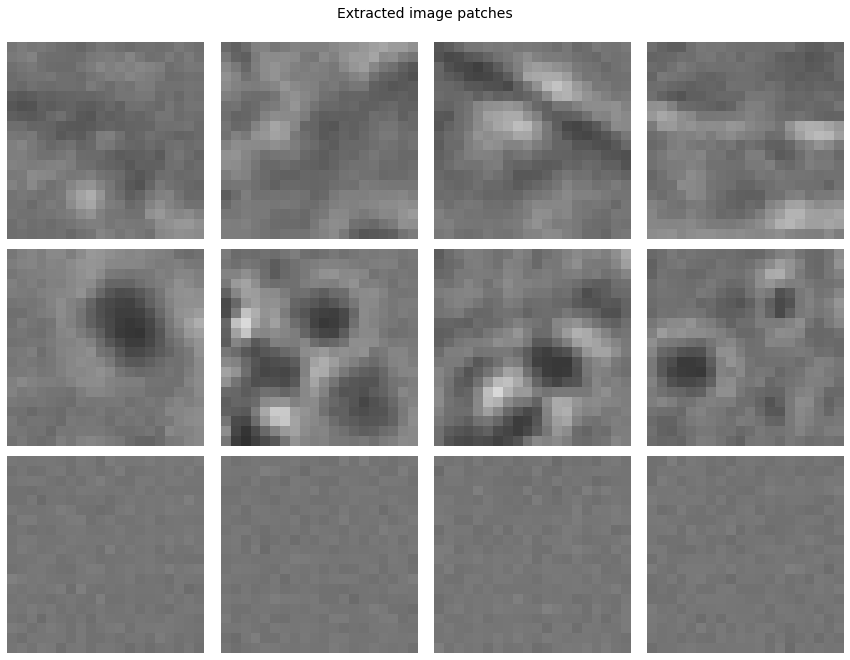

In [4]:
fig = plt.figure(figsize=(12, 12))

for i, patch in enumerate(border_patches):
    ax = fig.add_subplot(4, len(border_patches), i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Border %d' % (i + 1))
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    plt.axis("off")
#     fig.savefig('Border/Border %d.png'% (i + 29) , transparent=True, bbox_inches=extent)

for i, patch in enumerate(center_patches):
    ax = fig.add_subplot(4, len(border_patches), len(border_patches) + i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Center %d' % (i + 1))
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    plt.axis("off")
#     fig.savefig('Center/Center %d.png'% (i + 29) , transparent=True, bbox_inches=extent)

for i, patch in enumerate(blank_patches):
    ax = fig.add_subplot(4, len(center_patches), len(center_patches)*2 +i+1 )
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Blank %d' % (i + 1))
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    plt.axis("off")
#     fig.savefig('Blank/Blank %d.png'% (i + 29) , transparent=True, bbox_inches=extent)


# display the patches and plot
fig.suptitle('Extracted image patches', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

# Compute GLCM properties for each patch


In [5]:

xs = []
ys = []
for patch in (border_patches + center_patches + blank_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

(-0.5, 511.5, 511.5, -0.5)

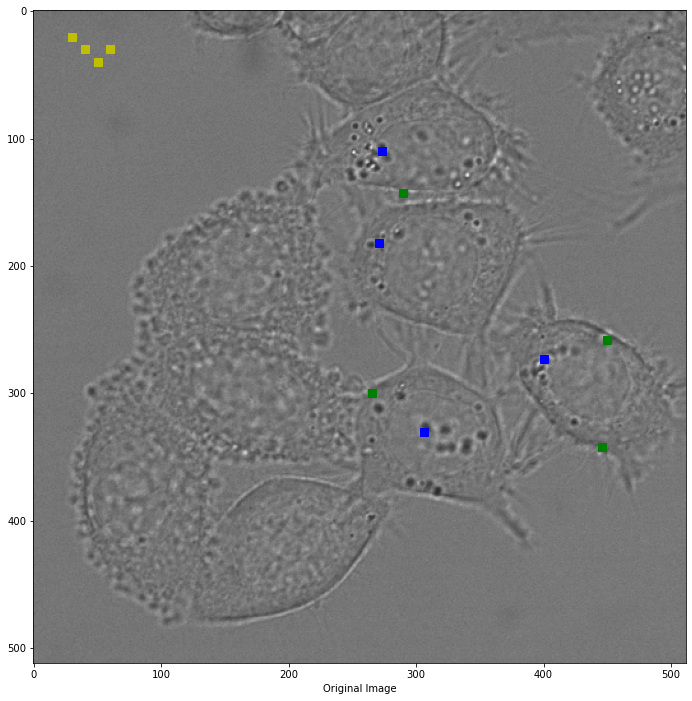

In [6]:
# create the figure
fig = plt.figure(figsize=(12, 12))

# display original image with locations of patches
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in border_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs', markersize=8)
for (y, x) in center_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs', markersize=8)
for (y, x) in blank_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'ys', markersize=8)

ax.set_xlabel('Original Image')
ax.axis('image')

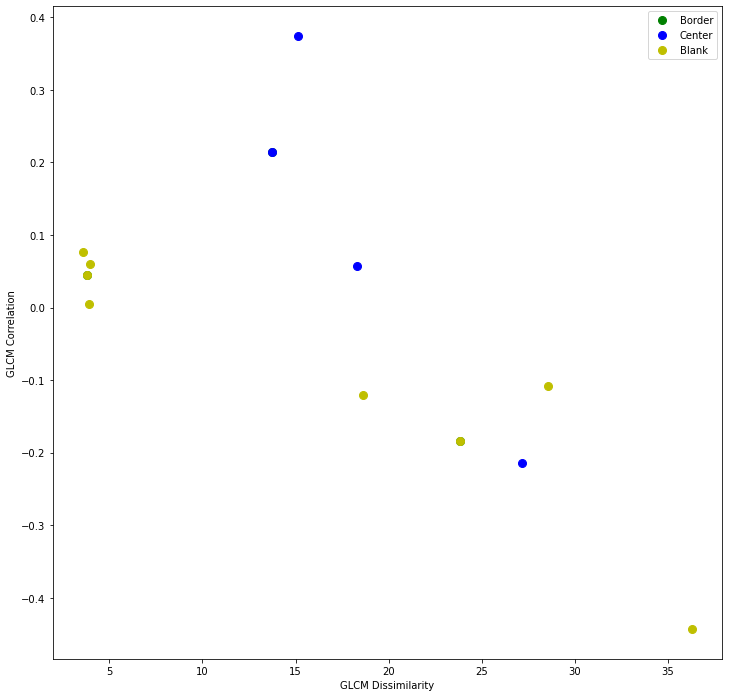

In [7]:
fig = plt.figure(figsize=(12, 12))

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs[::len(border_patches)], ys[::len(border_patches)], 'go', label='Border', markersize=8)
ax.plot(xs[:len(center_patches):], ys[:len(center_patches):], 'bo', label='Center', markersize=8)
ax.plot(xs[len(blank_patches)::], ys[len(blank_patches)::], 'yo', label='Blank', markersize=8)

ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()